
**Programming Assignment 2**





**Name : Somya Dhar**

**ID : 18-36396-1**

**Section : A**

In [1]:
import keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
import cv2
import numpy as np
import random
import pickle
from tqdm import tqdm

from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!nvidia-smi

Sun Jun 27 16:41:45 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
# Data input from kaggle
!pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
!kaggle datasets download -d grassknoted/asl-alphabet

Saving kaggle.json to kaggle.json
ref                                                           title                                              size  lastUpdated          downloadCount  
------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                   Reddit Vaccine Myths                              232KB  2021-06-27 12:35:43           8383  
crowww/a-large-scale-fish-dataset                             A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           5142  
imsparsh/musicnet-dataset                                     MusicNet Dataset                                   22GB  2021-02-18 14:12:19           1749  
promptcloud/careerbuilder-job-listing-2020                    Careerbuilder Job Listing 2020                     42MB  2021-03-05 06:59:52           1169  
coloradokb/dandelionimages    

In [4]:
# unzip file
!unzip asl-alphabet.zip

Streaming output truncated to the last 5000 lines.
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing19.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1908.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1909.jpg  
  inflating: asl_alphabet_tr

In [5]:
# Folder path
TRAIN_DATA_DIR = '/content/asl_alphabet_train/asl_alphabet_train'

In [6]:
IMG_SIZE = 32
CATEGORIES = []

for i in os.listdir(TRAIN_DATA_DIR):
    CATEGORIES.append(i)
    
print(CATEGORIES)

['G', 'O', 'Q', 'Y', 'P', 'C', 'M', 'W', 'X', 'T', 'space', 'R', 'del', 'K', 'nothing', 'A', 'L', 'B', 'Z', 'U', 'E', 'J', 'F', 'D', 'S', 'V', 'N', 'I', 'H']


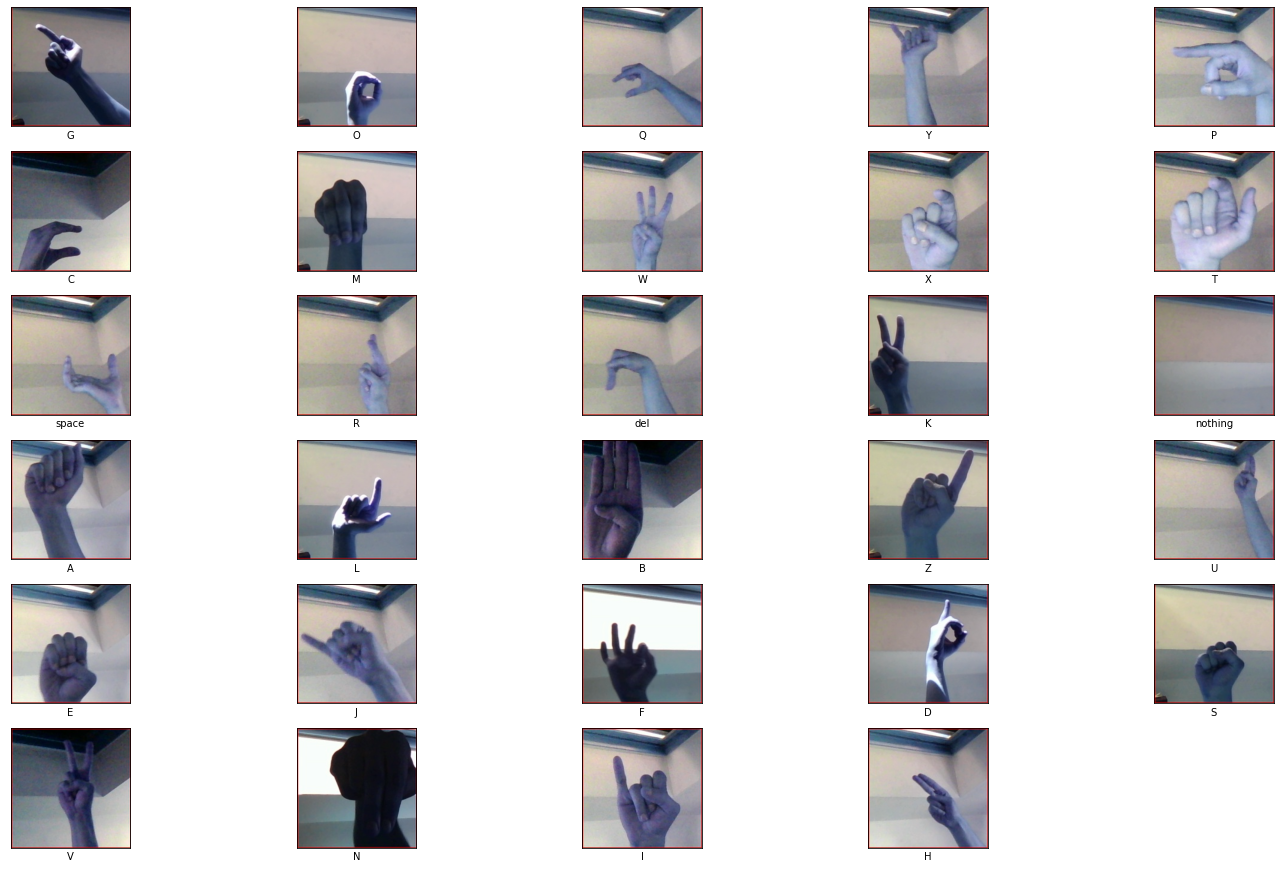

In [7]:
plt.figure(figsize=(20,20))
i=0
for c in CATEGORIES:  
    path = os.path.join(TRAIN_DATA_DIR,c)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.subplot(10,5,i+1)
        plt.imshow(img_array)
        plt.xlabel(c)
        plt.xticks([])
        plt.yticks([])
        i += 1
        break

plt.tight_layout()        
plt.show()

In [11]:
train_img = []
labels = []
size = 32,32
index = -1
for folder in tqdm(os.listdir(TRAIN_DATA_DIR)):
    index +=1
    for img in os.listdir(TRAIN_DATA_DIR + "/" + folder):
        temp_img = cv2.imread(TRAIN_DATA_DIR + '/' + folder + '/' + img)
        temp_img = cv2.resize(temp_img, size)
        train_img.append(temp_img)
        labels.append(index)

train_img = np.array(train_img)

#Data normalization
mean_img = np.mean(train_img, axis=0)
train_img = train_img -mean_img

train_img = train_img.astype('float32')
x_train, x_test, y_train, y_test = train_test_split(train_img, labels, test_size = 0.1)

print('Train data shape =', x_train.shape)
print('Test data shape =', x_test.shape)
    

100%|██████████| 29/29 [00:52<00:00,  1.81s/it]


Train data shape = (78300, 32, 32, 3)
Test data shape = (8700, 32, 32, 3)


In [18]:
images = []
labels = []
y_train = np.array(y_train)

y_test = np.array(y_test)


#x_train = np.array(x_train).reshape(-1,200,200,3)/255.0
#x_test =  x_test/255.0

In [16]:
# VGG -16 CNN Architecture

model = keras.Sequential([
    keras.Input(shape=x_train.shape[1:]),
    
    layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"),
    layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    layers.Flatten(),
    layers.Dense(4096,activation="relu"),
    layers.Dense(4096,activation="relu"),
    layers.Dense(29, activation="softmax")
    ])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 8, 8, 256)        

In [19]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [20]:
h = model.fit(x=x_train, y=y_train, epochs=20,validation_split=0.1, batch_size=128,shuffle = True)

Epoch 1/20
551/551 [==============================] - 69s 65ms/step - loss: 1.4211 - accuracy: 0.5252 - val_loss: 0.3587 - val_accuracy: 0.8655
Epoch 2/20
551/551 [==============================] - 35s 63ms/step - loss: 0.2311 - accuracy: 0.9178 - val_loss: 0.1018 - val_accuracy: 0.9651
Epoch 3/20
551/551 [==============================] - 35s 63ms/step - loss: 0.0870 - accuracy: 0.9700 - val_loss: 0.0467 - val_accuracy: 0.9847
Epoch 4/20
551/551 [==============================] - 35s 63ms/step - loss: 0.0473 - accuracy: 0.9845 - val_loss: 0.1267 - val_accuracy: 0.9590
Epoch 5/20
551/551 [==============================] - 35s 63ms/step - loss: 0.0471 - accuracy: 0.9847 - val_loss: 0.0476 - val_accuracy: 0.9835
Epoch 6/20
551/551 [==============================] - 35s 63ms/step - loss: 0.0325 - accuracy: 0.9896 - val_loss: 0.0352 - val_accuracy: 0.9889
Epoch 7/20
551/551 [==============================] - 35s 63ms/step - loss: 0.0317 - accuracy: 0.9900 - val_loss: 0.0348 - val_accuracy:

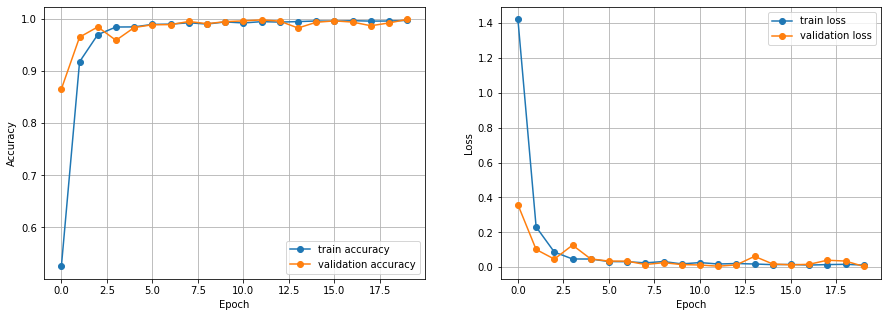

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [22]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

272/272 [==============================] - 3s 10ms/step - loss: 0.0038 - accuracy: 0.9992

Test Accuracy: 0.999195396900177

Test Loss: 0.0037517244927585125


In [23]:
predictions = model.predict(x_test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

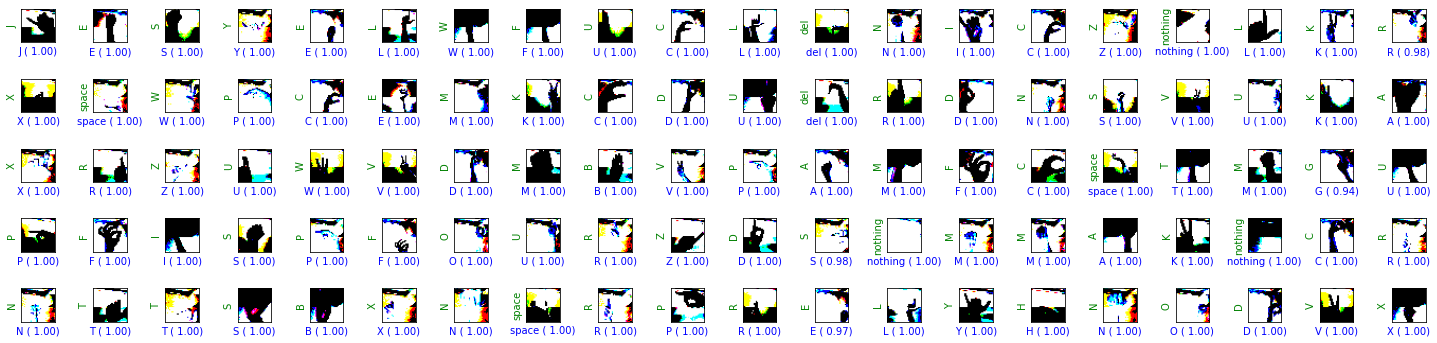

In [27]:
ROWS = 5
COLS = 20

random_indices = random.sample(range(x_test.shape[0]), ROWS*COLS)
sample_images = x_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(32,32,3),cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{CATEGORIES[prediction]} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{CATEGORIES[prediction]} ({confidence: .2f})", color='r')
        plt.ylabel(CATEGORIES[sample_labels[i]], color='g')
        i += 1
        
plt.tight_layout()
plt.show()